In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor, plot_importance
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression , RidgeClassifier
from sklearn.tree import plot_tree 
import lightgbm as lgb

In [12]:
df = pd.read_csv("../dataset/clean_output.csv")

In [13]:
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [14]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.lower()

df.columns = df.columns.str.lower()

Data Analysis

In [15]:
df.shape

(11055, 31)

In [16]:
df.columns

Index(['having_ip_address', 'url_length', 'shortining_service',
       'having_at_symbol', 'double_slash_redirecting', 'prefix_suffix',
       'having_sub_domain', 'sslfinal_state', 'domain_registeration_length',
       'favicon', 'port', 'https_token', 'request_url', 'url_of_anchor',
       'links_in_tags', 'sfh', 'submitting_to_email', 'abnormal_url',
       'redirect', 'on_mouseover', 'rightclick', 'popupwidnow', 'iframe',
       'age_of_domain', 'dnsrecord', 'web_traffic', 'page_rank',
       'google_index', 'links_pointing_to_page', 'statistical_report',
       'result'],
      dtype='object')

In [17]:
df.info

<bound method DataFrame.info of        having_ip_address  url_length  shortining_service  having_at_symbol  \
0                     -1           1                   1                 1   
1                      1           1                   1                 1   
2                      1           0                   1                 1   
3                      1           0                   1                 1   
4                      1           0                  -1                 1   
...                  ...         ...                 ...               ...   
11050                  1          -1                   1                -1   
11051                 -1           1                   1                -1   
11052                  1          -1                   1                 1   
11053                 -1          -1                   1                 1   
11054                 -1          -1                   1                 1   

       double_slash_redirecting

In [18]:
df.describe

<bound method NDFrame.describe of        having_ip_address  url_length  shortining_service  having_at_symbol  \
0                     -1           1                   1                 1   
1                      1           1                   1                 1   
2                      1           0                   1                 1   
3                      1           0                   1                 1   
4                      1           0                  -1                 1   
...                  ...         ...                 ...               ...   
11050                  1          -1                   1                -1   
11051                 -1           1                   1                -1   
11052                  1          -1                   1                 1   
11053                 -1          -1                   1                 1   
11054                 -1          -1                   1                 1   

       double_slash_redirecti

In [19]:
df.size

342705

In [20]:
df.corr

<bound method DataFrame.corr of        having_ip_address  url_length  shortining_service  having_at_symbol  \
0                     -1           1                   1                 1   
1                      1           1                   1                 1   
2                      1           0                   1                 1   
3                      1           0                   1                 1   
4                      1           0                  -1                 1   
...                  ...         ...                 ...               ...   
11050                  1          -1                   1                -1   
11051                 -1           1                   1                -1   
11052                  1          -1                   1                 1   
11053                 -1          -1                   1                 1   
11054                 -1          -1                   1                 1   

       double_slash_redirecting

In [21]:
df.isnull().sum()

having_ip_address              0
url_length                     0
shortining_service             0
having_at_symbol               0
double_slash_redirecting       0
prefix_suffix                  0
having_sub_domain              0
sslfinal_state                 0
domain_registeration_length    0
favicon                        0
port                           0
https_token                    0
request_url                    0
url_of_anchor                  0
links_in_tags                  0
sfh                            0
submitting_to_email            0
abnormal_url                   0
redirect                       0
on_mouseover                   0
rightclick                     0
popupwidnow                    0
iframe                         0
age_of_domain                  0
dnsrecord                      0
web_traffic                    0
page_rank                      0
google_index                   0
links_pointing_to_page         0
statistical_report             0
result    

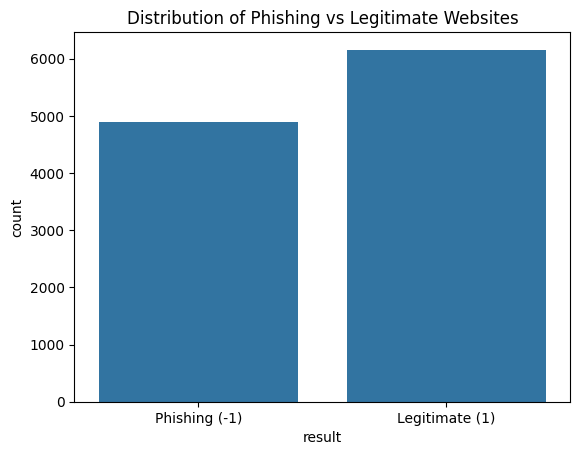

In [22]:
# Target Variable Distribution
sns.countplot(x='result', data=df)
plt.title('Distribution of Phishing vs Legitimate Websites')
plt.xticks(ticks=[0,1], labels=['Phishing (-1)', 'Legitimate (1)'])
plt.show()


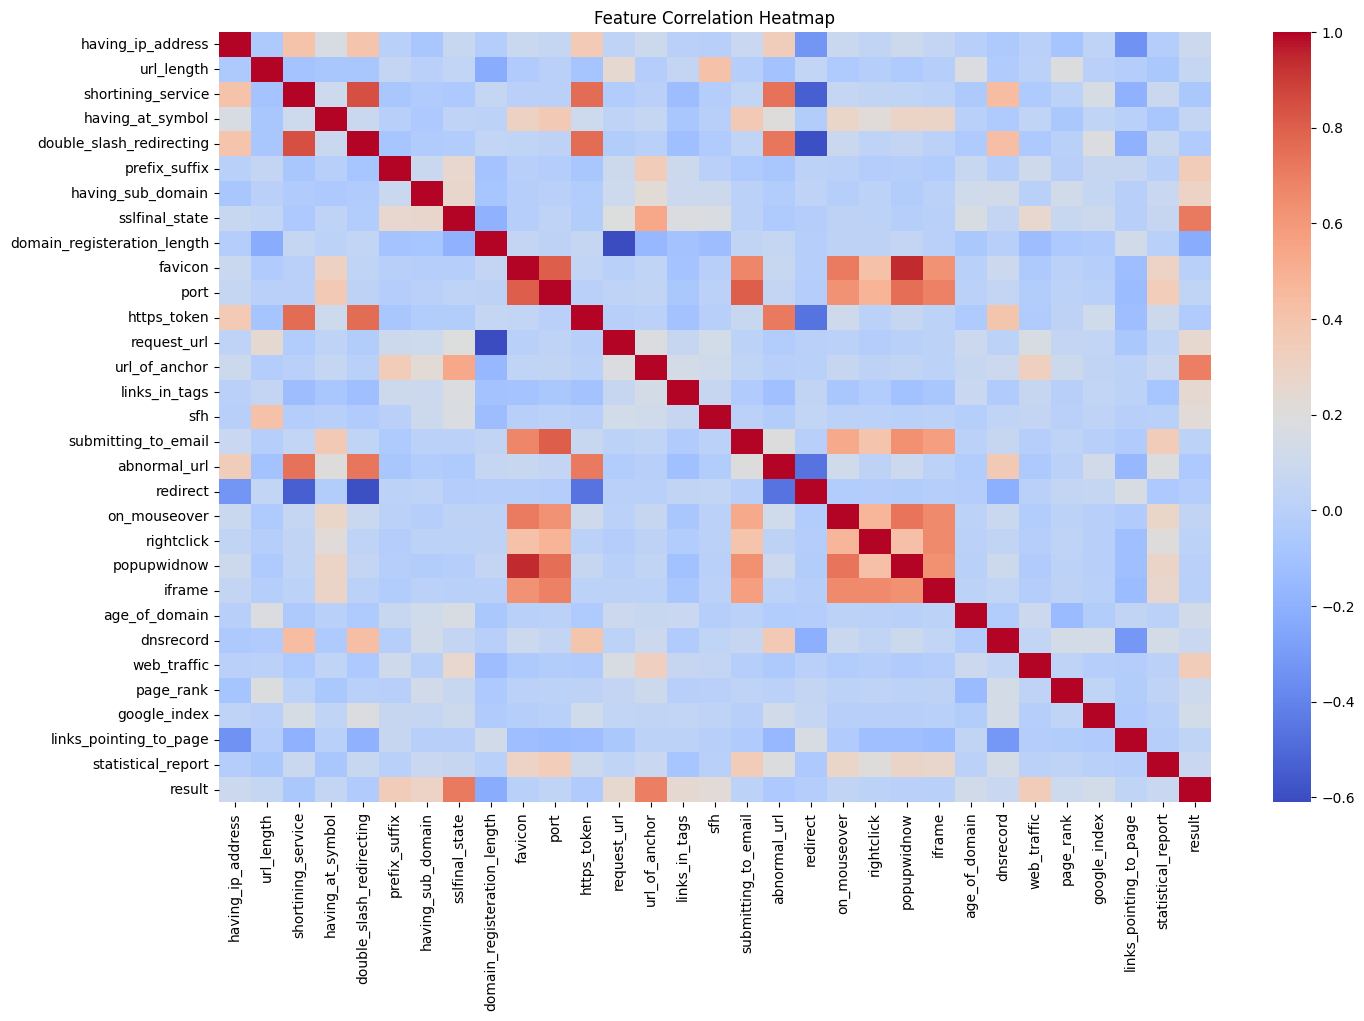

In [23]:
# Correlation Heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()


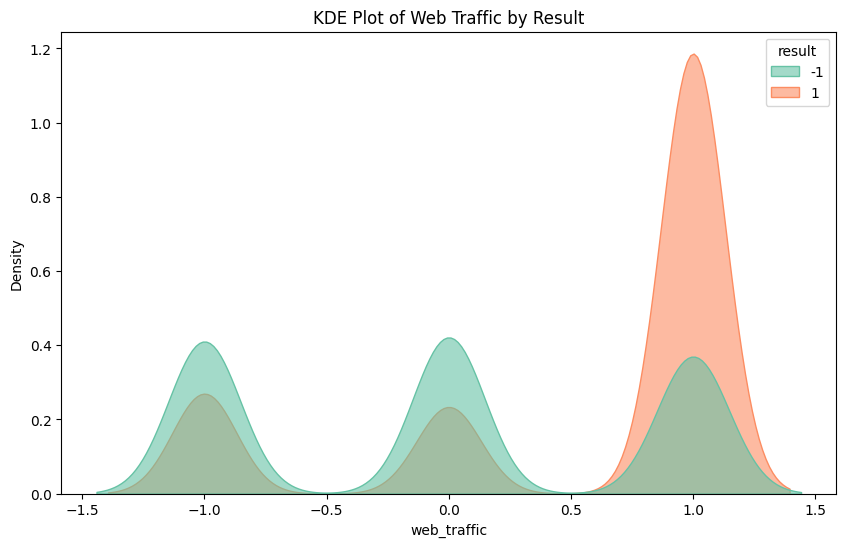

In [24]:
# Example KDE for 'web_traffic' based on 'Result'
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='web_traffic', hue='result', fill=True, palette='Set2', alpha=0.6)
plt.title('KDE Plot of Web Traffic by Result')
plt.show()

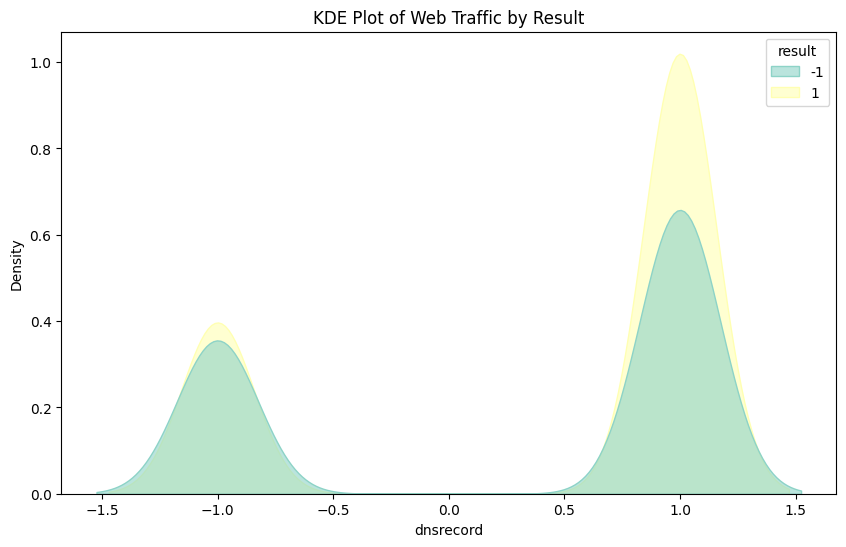

In [25]:
# Example KDE for 'dnsrecord' based on 'Result'
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='dnsrecord', hue='result', fill=True, palette='Set3', alpha=0.6)
plt.title('KDE Plot of Web Traffic by Result')
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_14764\2849057698.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='result', data=df, palette='Set1')


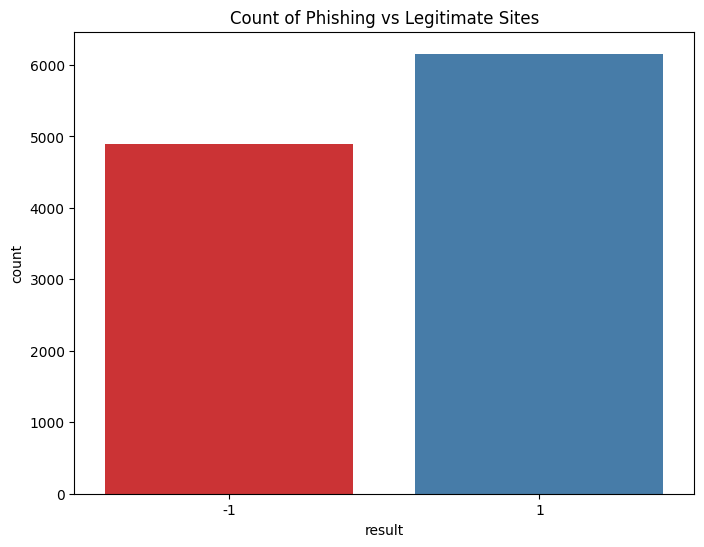

In [26]:
plt.figure(figsize=(8,6))
sns.countplot(x='result', data=df, palette='Set1')
plt.title('Count of Phishing vs Legitimate Sites')
plt.show()

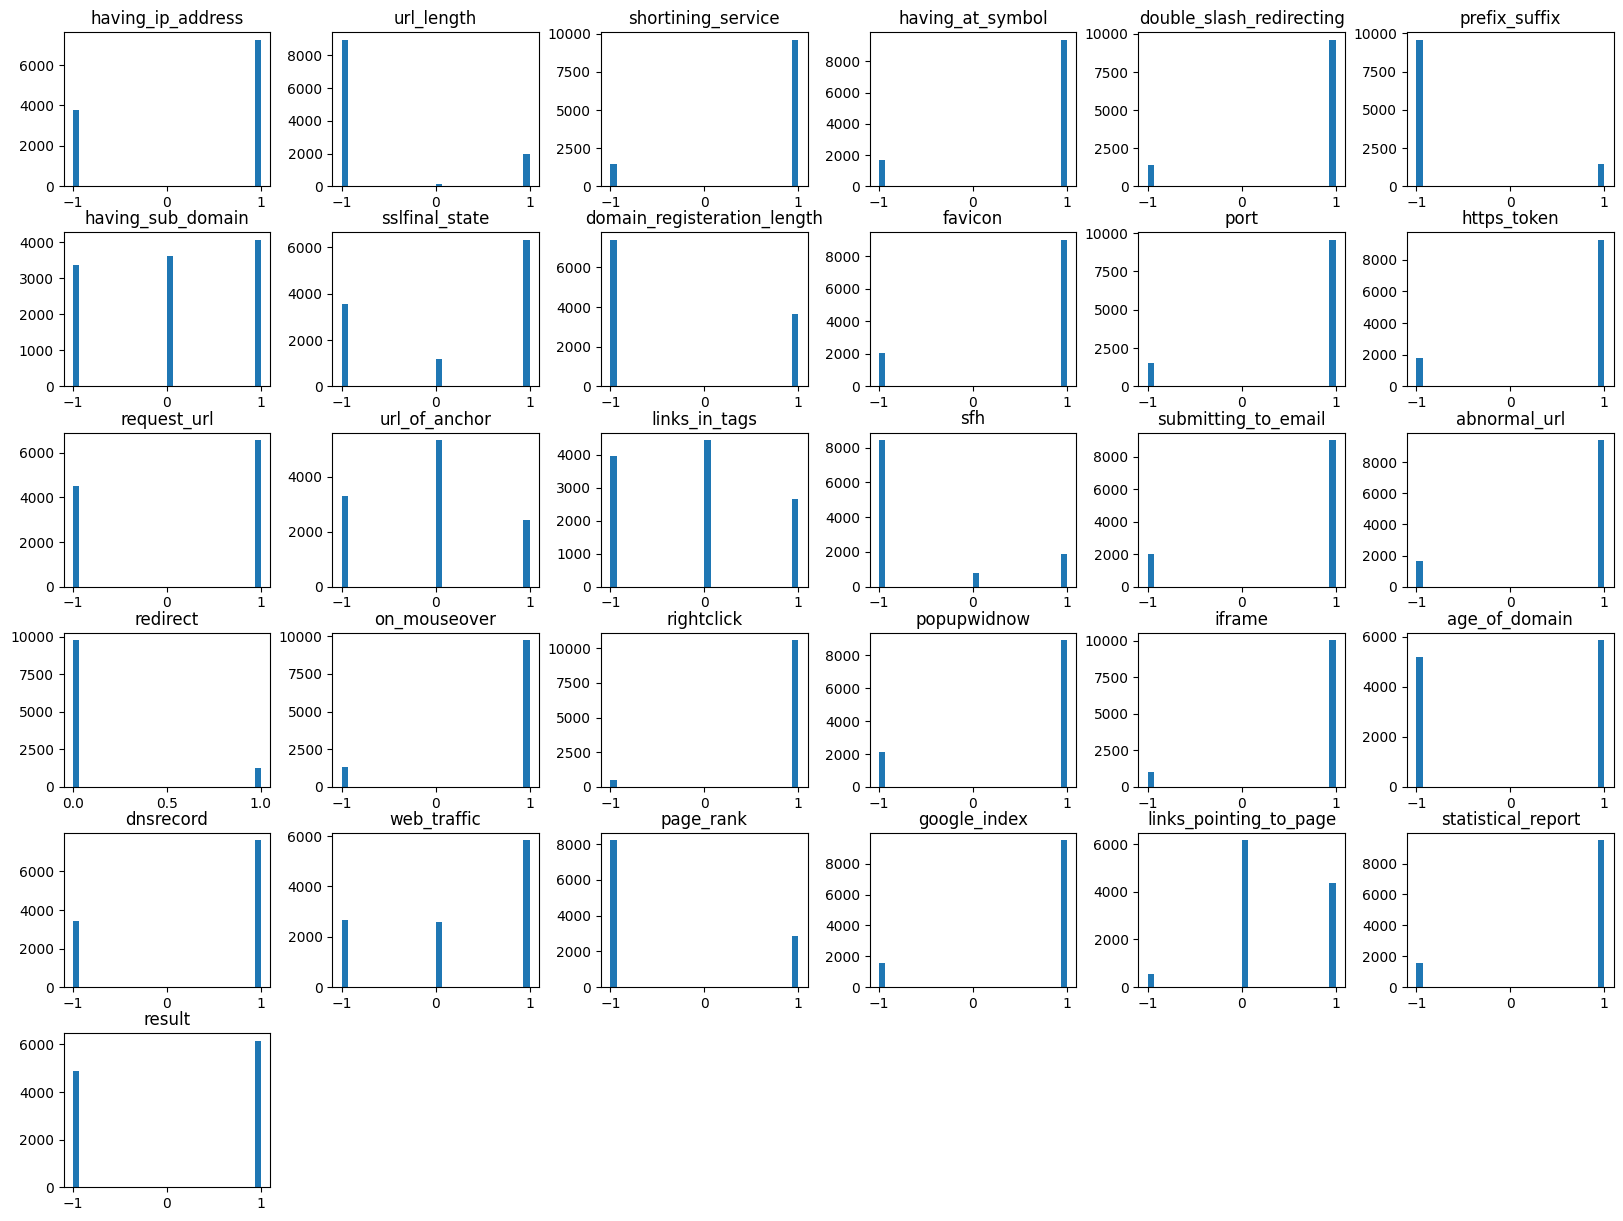

In [27]:
hist_plot = df.hist(figsize=(20, 15), bins=30, grid=False)

C:\Users\admin\AppData\Local\Temp\ipykernel_14764\1376850084.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='result', y='web_traffic', data=df, palette='Set3')


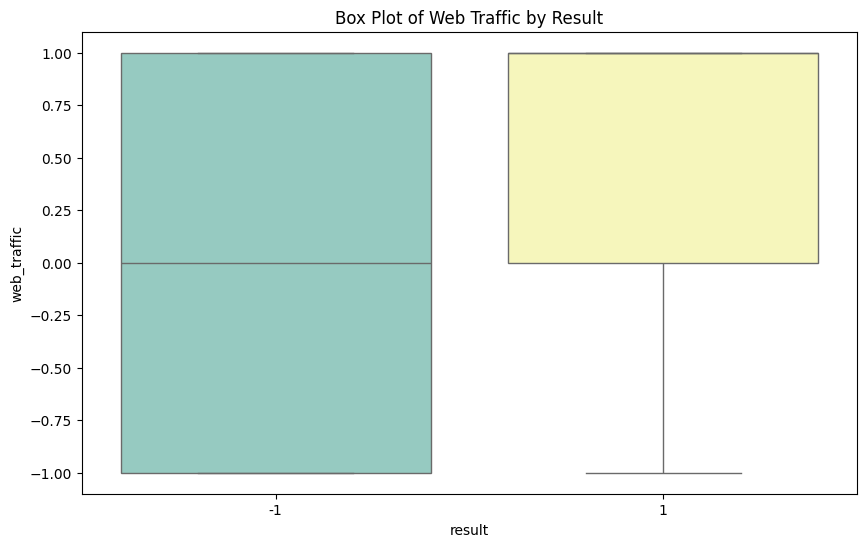

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(x='result', y='web_traffic', data=df, palette='Set3')
plt.title('Box Plot of Web Traffic by Result')
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_14764\2520651205.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='result', y='page_rank', data=df, estimator='mean', palette='pastel')


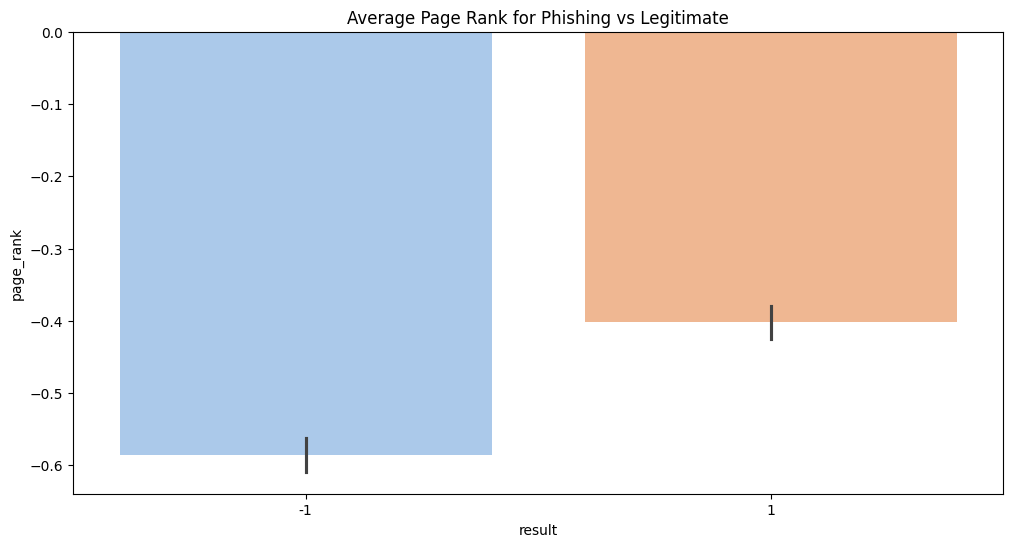

In [29]:
plt.figure(figsize=(12,6))
sns.barplot(x='result', y='page_rank', data=df, estimator='mean', palette='pastel')
plt.title('Average Page Rank for Phishing vs Legitimate')
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_14764\2755494987.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='result', y='page_rank', data=df.sample(300), palette='Set2')
c:\Users\admin\Desktop\cs_project\venv\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 7.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\admin\Desktop\cs_project\venv\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 18.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\admin\Desktop\cs_project\venv\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 42.5% of the points cannot be placed; you may want to decrease the size of the markers or use st

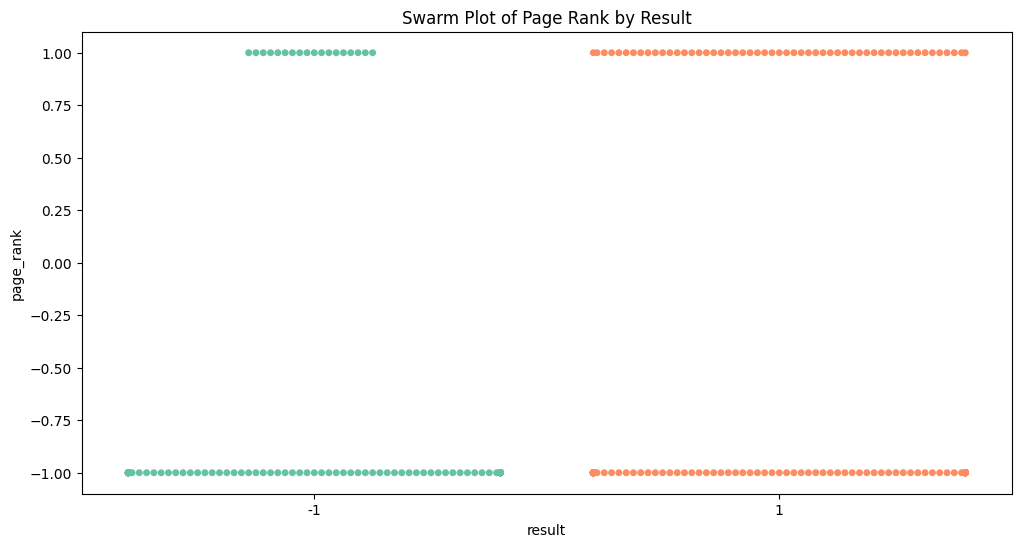

In [30]:
plt.figure(figsize=(12,6))
sns.swarmplot(x='result', y='page_rank', data=df.sample(300), palette='Set2')
plt.title('Swarm Plot of Page Rank by Result')
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_14764\1971916769.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='result', y='links_pointing_to_page', data=df, palette='Set2')


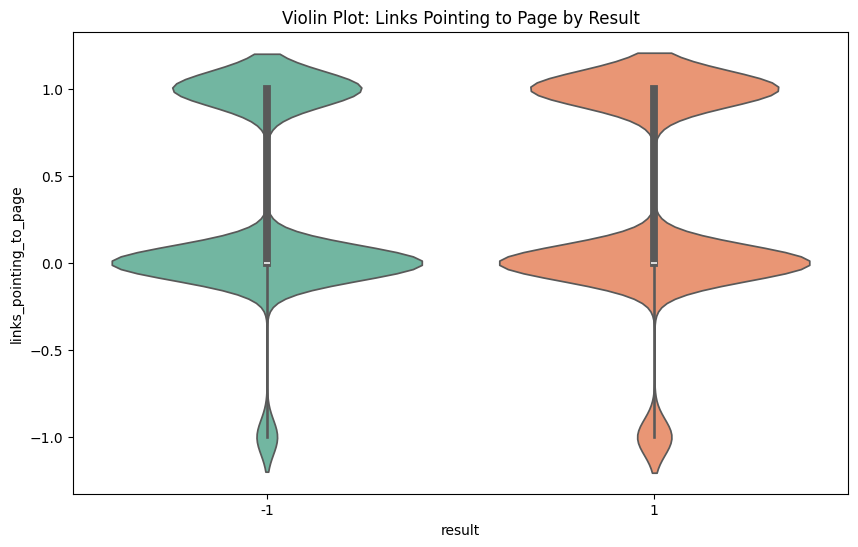

In [31]:
plt.figure(figsize=(10,6))
sns.violinplot(x='result', y='links_pointing_to_page', data=df, palette='Set2')
plt.title('Violin Plot: Links Pointing to Page by Result')
plt.show()

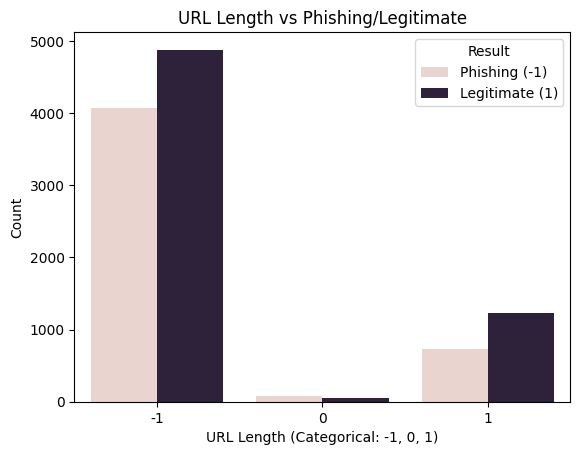

In [32]:
# Feature-wise Distribution & Visualization


sns.countplot(x='url_length', hue='result', data=df)
plt.title('URL Length vs Phishing/Legitimate')
plt.xlabel('URL Length (Categorical: -1, 0, 1)')
plt.ylabel('Count')
plt.legend(title='Result', labels=['Phishing (-1)', 'Legitimate (1)'])
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_14764\541452667.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:Red'` for the same effect.

  sns.countplot(x='sslfinal_state', hue='result', data=df, color='Red')


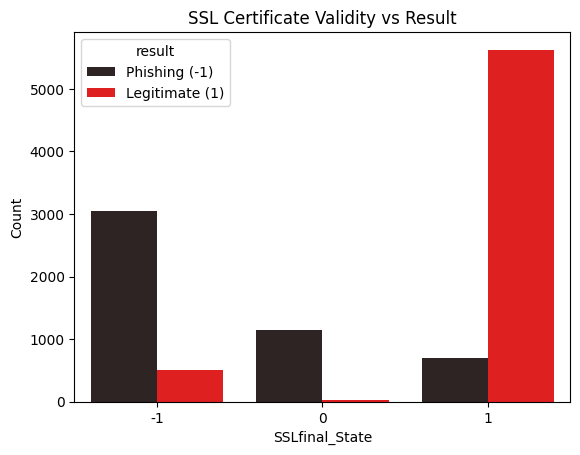

In [33]:
sns.countplot(x='sslfinal_state', hue='result', data=df, color='Red')
plt.title('SSL Certificate Validity vs Result')
plt.xlabel('SSLfinal_State')
plt.ylabel('Count')
plt.legend(title='result', labels=['Phishing (-1)', 'Legitimate (1)'])
plt.show()


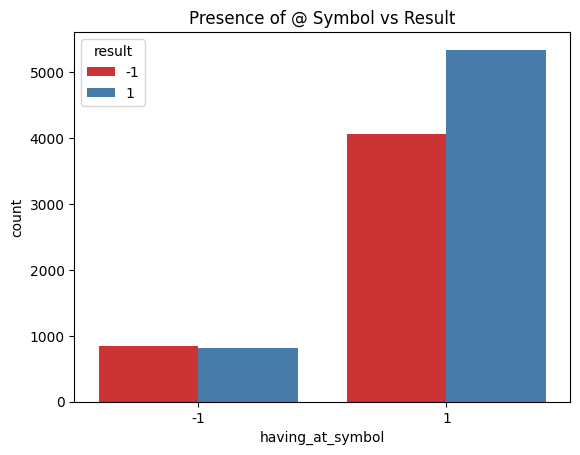

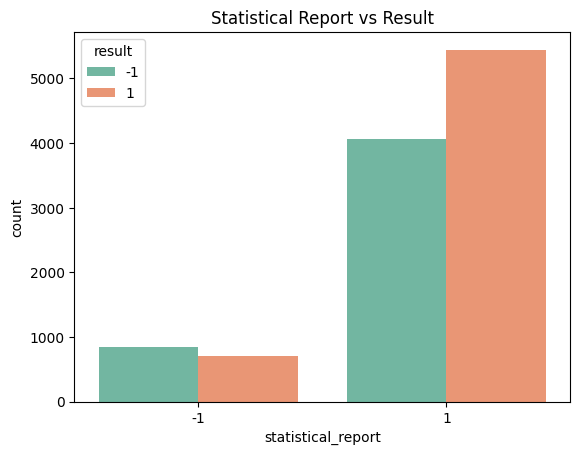

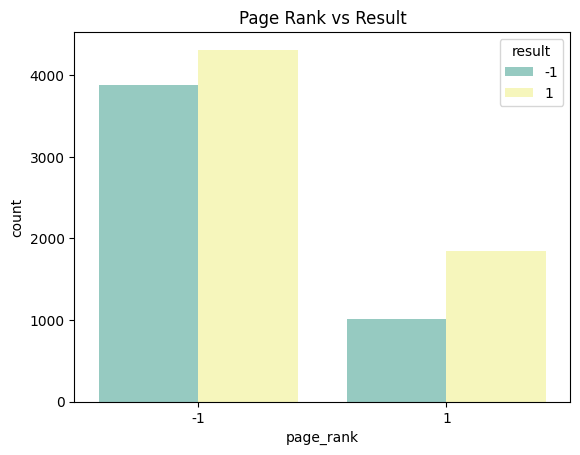

In [34]:
# At symbol presence
sns.countplot(x='having_at_symbol', hue='result', data=df, palette='Set1')
plt.title('Presence of @ Symbol vs Result')
plt.show()

# Statistical report
sns.countplot(x='statistical_report', hue='result', data=df, palette='Set2')
plt.title('Statistical Report vs Result')
plt.show()

# Page Rank
sns.countplot(x='page_rank', hue='result', data=df, palette='Set3')
plt.title('Page Rank vs Result')
plt.show()



In [35]:
# Class Balance Check (Phishing vs Legitimate)

#A. Counts of Each Class
df['result'].value_counts()

#B. Percent Distribution
df['result'].value_counts(normalize=True) * 100

result
 1    55.694256
-1    44.305744
Name: proportion, dtype: float64

Features and Target

In [36]:
x = df.drop('result', axis=1)
y = df['result']

Splitting dataset

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Model Training

Random Forest

In [38]:
model1 = RandomForestClassifier(random_state=42)
model1.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [39]:
y_pred = model1.predict(x_test)

In [40]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9669832654907282
Confusion Matrix: [[ 909   47]
 [  26 1229]]
Classification Report:
               precision    recall  f1-score   support

          -1       0.97      0.95      0.96       956
           1       0.96      0.98      0.97      1255

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



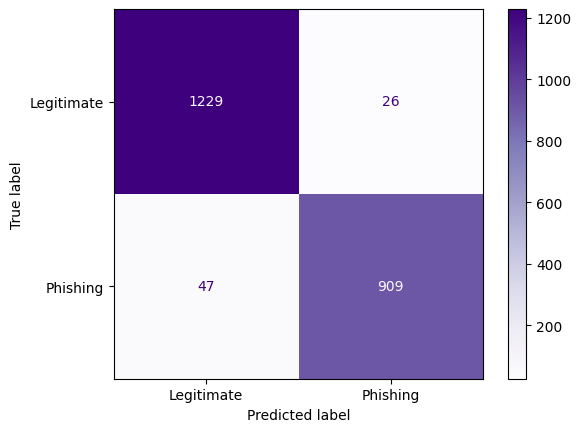

In [41]:
y_pred = model1.predict(x_test)
cm = confusion_matrix(y_test, y_pred, labels=[1, -1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Legitimate", "Phishing"])
disp.plot(cmap='Purples')

In [42]:
# Feature Importance

importances = model1.feature_importances_
features = x.columns

# Display top important features
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df.head(10))


                        Feature  Importance
7                sslfinal_state    0.326228
13                url_of_anchor    0.245541
25                  web_traffic    0.069664
6             having_sub_domain    0.064523
14                links_in_tags    0.043273
5                 prefix_suffix    0.037831
15                          sfh    0.020350
12                  request_url    0.019330
28       links_pointing_to_page    0.018834
8   domain_registeration_length    0.017556


Xgboost

In [43]:
y = df["result"]
x = df.drop(columns=["result"])

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [45]:
xgb_params = {
    'n_estimators': 200,
    'max_depth': 8,
    'learning_rate': 0.5,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eval_metric': 'mlogloss',
    'tree_method': 'hist',
    'verbosity': 1
}

In [46]:
model2 = XGBRegressor(**xgb_params)
model2.fit(x_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


In [47]:
y_pred = model2.predict(x_test)
y_pred_labels = np.where(y_pred >= 0, 1, -1)

Accuracy: 0.9633649932157394
Confusion Matrix: [[ 906   50]
 [  31 1224]]
Classification Report:
               precision    recall  f1-score   support

          -1       0.97      0.95      0.96       956
           1       0.96      0.98      0.97      1255

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



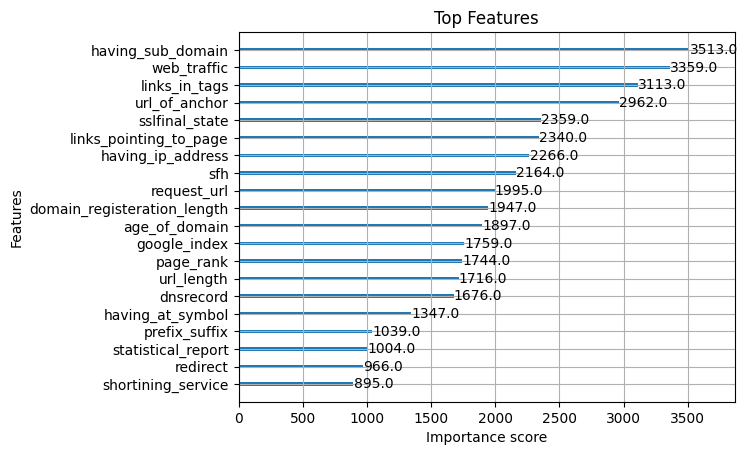

In [48]:
print("Accuracy:", accuracy_score(y_test, y_pred_labels))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_labels))
print("Classification Report:\n", classification_report(y_test, y_pred_labels))
plot_importance(model2, max_num_features=20)
plt.title("Top Features")
plt.show()

Catboost

In [49]:
model3 = CatBoostClassifier(verbose=0, iterations=100)
model3.fit(x_train, y_train)

In [50]:
y_pred = model3.predict(x_test)

In [51]:
print("accuracy_score:", accuracy_score(y_test, y_pred))
print("Attack Type Classification Report:")
print(classification_report(y_test, y_pred))


accuracy_score: 0.9678878335594754
Attack Type Classification Report:
              precision    recall  f1-score   support

          -1       0.98      0.95      0.96       956
           1       0.96      0.98      0.97      1255

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



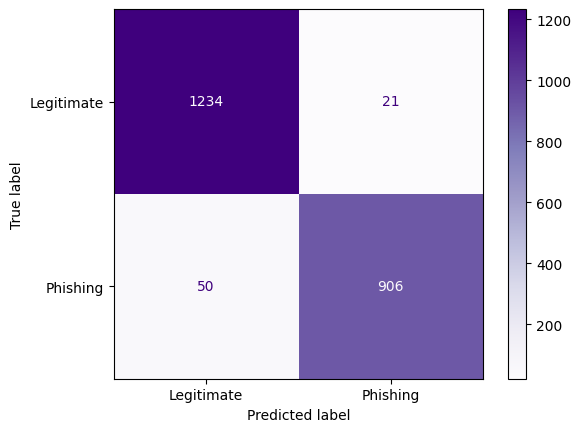

In [52]:
y_pred = model3.predict(x_test)
cm = confusion_matrix(y_test, y_pred, labels=[1, -1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Legitimate", "Phishing"])
disp.plot(cmap='Purples')

In [53]:
#lightGBM

In [54]:
model4 = lgb.LGBMClassifier(
    n_estimators=200,      # Increase from 100 to 200
    max_depth=6,           # Limit tree depth to reduce overfitting
    learning_rate=0.05,    # Lower learning rate
    num_leaves=31,         # Default, can be tuned
    random_state=42
)

model4.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 4902, number of negative: 3942
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000918 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 89
[LightGBM] [Info] Number of data points in the train set: 8844, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.554274 -> initscore=0.217955
[LightGBM] [Info] Start training from score 0.217955


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,6
,learning_rate,0.05
,n_estimators,200
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [55]:
y_pred = model4.predict(x_test)

In [56]:
print("accuracy_score:", accuracy_score(y_test, y_pred))
print("Attack Type Classification Report:")
print(classification_report(y_test, y_pred))

accuracy_score: 0.9633649932157394
Attack Type Classification Report:
              precision    recall  f1-score   support

          -1       0.97      0.94      0.96       956
           1       0.96      0.98      0.97      1255

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



In [57]:
from sklearn.model_selection import cross_val_score
cross_val_score(model4, x, y, cv=5)


[LightGBM] [Info] Number of positive: 4926, number of negative: 3918
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000766 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 89
[LightGBM] [Info] Number of data points in the train set: 8844, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.556988 -> initscore=0.228946
[LightGBM] [Info] Start training from score 0.228946
[LightGBM] [Info] Number of positive: 4926, number of negative: 3918
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000771 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 89
[LightGBM] [Info] Number of data points in the train set: 8844, number of used features: 30
[LightGBM] [Info] [binary:Boos

array([0.96200814, 0.96788783, 0.96698327, 0.95658073, 0.94029851])

C:\Users\admin\AppData\Local\Temp\ipykernel_14764\70012394.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_imp, palette='viridis')


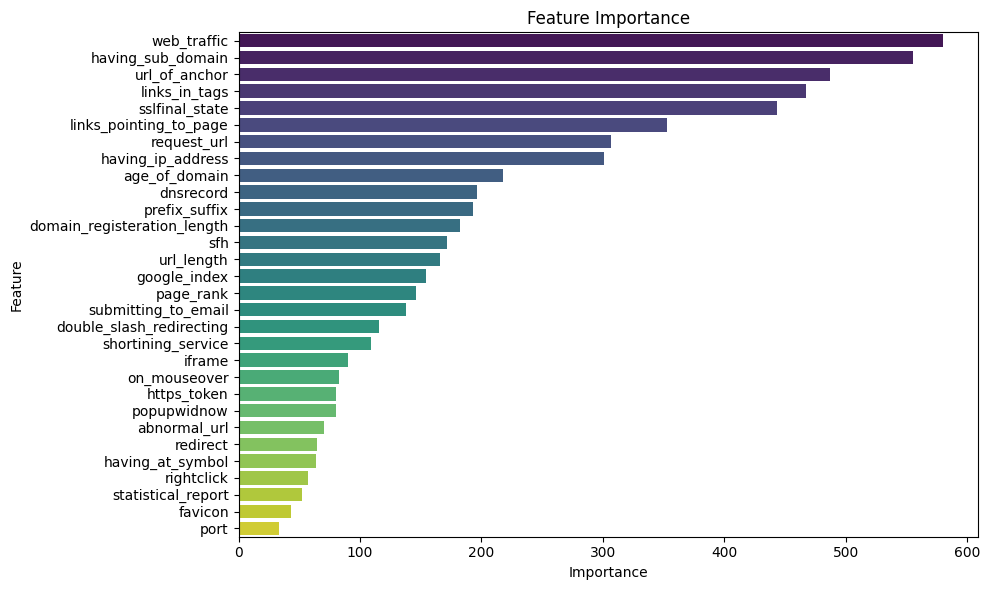

In [58]:

feature_imp = pd.DataFrame({
    'Feature': model4.feature_name_,
    'Importance': model4.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_imp, palette='viridis')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

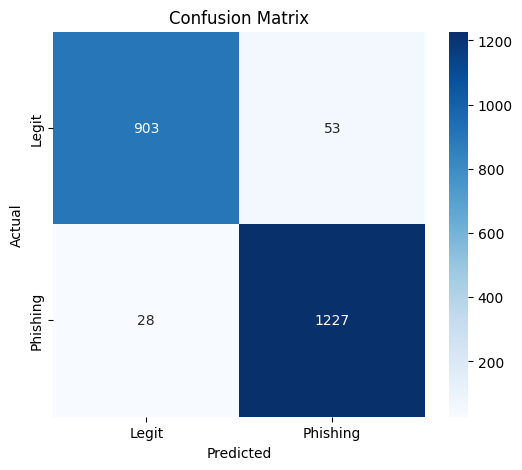

In [59]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legit','Phishing'], yticklabels=['Legit','Phishing'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

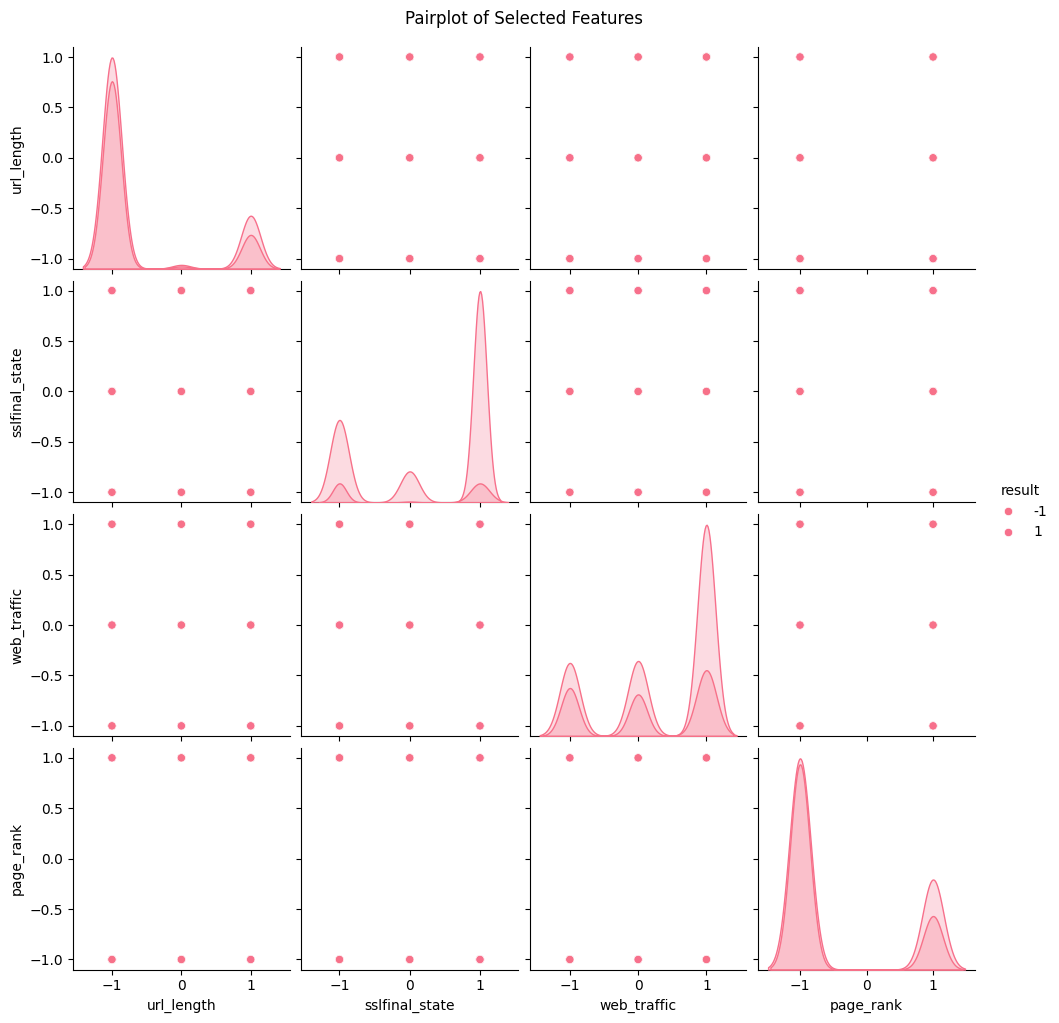

In [60]:
sns.pairplot(df[['url_length', 'sslfinal_state', 'web_traffic', 'page_rank', 'result']], hue='result', palette='husl')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

In [61]:
#logistic regression

In [62]:
model5 = LogisticRegression(max_iter=1000)
model5.fit(x_train, y_train)
y_pred = model5.predict(x_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.924468566259611
              precision    recall  f1-score   support

          -1       0.92      0.90      0.91       956
           1       0.93      0.94      0.93      1255

    accuracy                           0.92      2211
   macro avg       0.92      0.92      0.92      2211
weighted avg       0.92      0.92      0.92      2211



In [63]:
#ridge regression

In [64]:
model6 = RidgeClassifier()
model6.fit(x_train, y_train)
y_pred = model6.predict(x_test)
print("Ridge Classifier Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Ridge Classifier Accuracy: 0.9208502939846224
              precision    recall  f1-score   support

          -1       0.93      0.88      0.91       956
           1       0.92      0.95      0.93      1255

    accuracy                           0.92      2211
   macro avg       0.92      0.92      0.92      2211
weighted avg       0.92      0.92      0.92      2211



In [65]:
model7 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
model7.fit(x_train, y_train)
y_pred = model7.predict(x_test)
print("Lasso (L1) Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Lasso (L1) Logistic Regression Accuracy: 0.9240162822252375
              precision    recall  f1-score   support

          -1       0.92      0.90      0.91       956
           1       0.93      0.94      0.93      1255

    accuracy                           0.92      2211
   macro avg       0.92      0.92      0.92      2211
weighted avg       0.92      0.92      0.92      2211



In [66]:
accuracies = {
    'CatBoost': 0.9678878335594754,
    'XGBoost':  0.9633649932157394,
    'LightGBM': 0.9633649932157394,
    'Random Forest':  0.9669832654907282,
    'Logistic Regression':  0.924468566259611,
    'Ridge Classifier': 0.9208502939846224,
    'Lasso (L1) Logistic Regression': 0.9240162822252375
}


C:\Users\admin\AppData\Local\Temp\ipykernel_14764\2063701494.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='coolwarm')


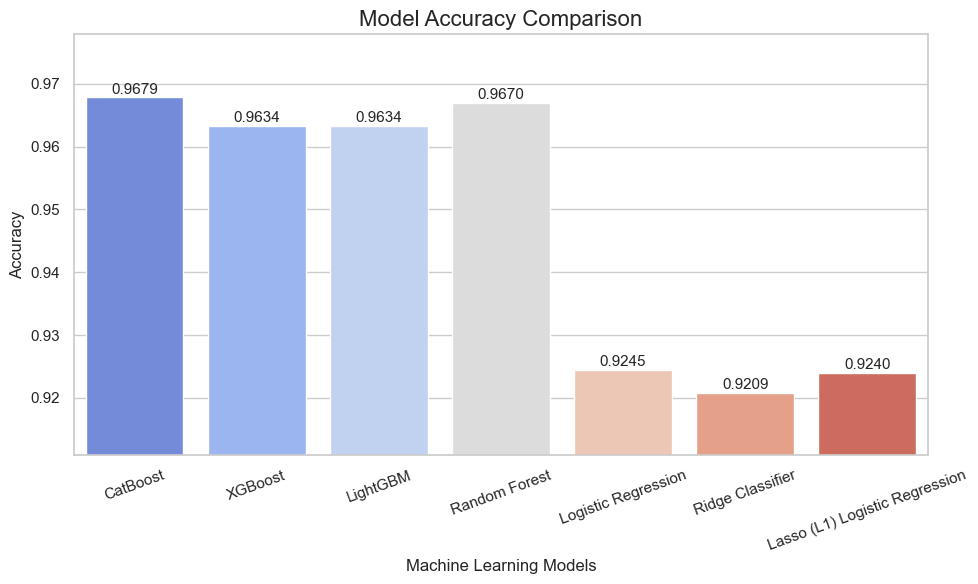

In [67]:
plt.figure(figsize=(10,6))
sns.set(style="whitegrid")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='coolwarm')

for i, value in enumerate(accuracies.values()):
    plt.text(i, value + 0.0001, f"{value:.4f}", ha='center', va='bottom', fontsize=11)

plt.title("Model Accuracy Comparison", fontsize=16)
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel("Machine Learning Models", fontsize=12)
plt.ylim(min(accuracies.values()) - 0.01, max(accuracies.values()) + 0.01)  # dynamic Y-axis

plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

In [68]:
import pickle as pkl

In [69]:
import pickle

# Save the CatBoost model
# with open('../savedModels/catboost_model.pkl', 'wb') as file:
#     pickle.dump(model3, file)


In [70]:

import joblib

joblib.dump(model3, '../savedModels/catboost_model.joblib')

['../savedModels/catboost_model.joblib']

In [71]:
demo_input1 = pd.DataFrame([[
    -1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, -1,
    -1, -1, 0, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, -1
]], columns=[
    'having_ip_address', 'url_length', 'shortining_service', 'having_at_symbol',
    'double_slash_redirecting', 'prefix_suffix', 'having_sub_domain', 'sslfinal_state',
    'domain_registeration_length', 'favicon', 'port', 'https_token', 'request_url',
    'url_of_anchor', 'links_in_tags', 'sfh', 'submitting_to_email', 'abnormal_url',
    'redirect', 'on_mouseover', 'rightclick', 'popupwidnow', 'iframe', 'age_of_domain',
    'dnsrecord', 'web_traffic', 'page_rank', 'google_index', 'links_pointing_to_page',
    'statistical_report'
])

prediction = model3.predict(demo_input1)
print("Predicted Result:", int(prediction[0]))

Predicted Result: -1


In [72]:
def predict_website_status(input_data, model):
    
    columns = [
        'having_ip_address', 'url_length', 'shortining_service', 'having_at_symbol',
        'double_slash_redirecting', 'prefix_suffix', 'having_sub_domain',
        'sslfinal_state', 'domain_registeration_length', 'favicon', 'port',
        'https_token', 'request_url', 'url_of_anchor', 'links_in_tags', 'sfh',
        'submitting_to_email', 'abnormal_url', 'redirect', 'on_mouseover',
        'rightclick', 'popupwidnow', 'iframe', 'age_of_domain', 'dnsrecord',
        'web_traffic', 'page_rank', 'google_index', 'links_pointing_to_page',
        'statistical_report'
    ]

    df = pd.DataFrame([input_data], columns=columns)
    prediction = model.predict(df)[0]
    return "Legitimate" if prediction == 1 else "Phishing"


In [73]:
demo_input2 = [
     1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1, -1, 1, -1, 1, -1,
    -1, -1, 0, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1
]

In [74]:
result = predict_website_status(demo_input2, model3)
print("Predicted site type:", result)

Predicted site type: Phishing


In [75]:
demo_input3 = [
     1, 1, 1, 1, 1, -1, 0, -1, 1, 1, 1, -1, 1, 1, 1, 1,
     1, 1, 0, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1
]

In [76]:
result = predict_website_status(demo_input3, model3)
print("Predicted site type:", result)

Predicted site type: Legitimate


In [77]:
demo_input4 = [
     -1, 1, 1, -1, 1, -1, 0, -1, 1, 1, -1, -1, 1, 1, 1, 1,
     1, 1, 0, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, -1
]

In [78]:
result = predict_website_status(demo_input4, model3)
print("Predicted site type:", result)

Predicted site type: Phishing
